#### Hello World Graph

##### Graph One

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
#State
class AgentState(TypedDict):
    message : str

#Node
def greeting_node(state:AgentState)->AgentState:
    #dock string - tells the LLM what this node is doing
    """Simple node that adds a greeting message to the state"""
    state['message'] = f"Hey {state['message']}, how are you doing!" 
    return state

In [6]:
#Define Graph
graph = StateGraph(state_schema=AgentState)
#add node
graph.add_node("greeter", action=greeting_node)
#start pioint
graph.set_entry_point("greeter")
#end point
graph.set_finish_point("greeter")

app = graph.compile()

In [7]:
type(app), type(graph)

(langgraph.graph.state.CompiledStateGraph, langgraph.graph.state.StateGraph)

In [8]:
app.invoke({'message':'Bob'})

{'message': 'Hey Bob, how are you doing!'}

#### Graph One Exercise

In [10]:
class AgentState(TypedDict):
    name : str

def node_one(state:AgentState)->AgentState:
    """This is node one"""
    name = f"{state['name']}, you're doing an amazing job learning LangGraph!"
    return AgentState(name=name)

In [11]:
graph = StateGraph(state_schema=AgentState)
graph.add_node(node='node one', action=node_one)
graph.set_entry_point('node one')
graph.set_finish_point('node one')

app = graph.compile()

In [12]:
app.invoke({'name':'Bob'})

{'name': "Bob, you're doing an amazing job learning LangGraph!"}

### Graph Two    
Multiple inputs

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    values:List[int]
    name:str
    result:str

In [3]:
def process_values(state:AgentState)->AgentState:
    """This function handles multiple inputs"""
    state['result'] = f"Hi {state['name']}, the sum of your values are {sum(state['values'])}"
    return state

In [4]:
graph = StateGraph(state_schema=AgentState)

graph.add_node(node='processor',action=process_values)
graph.set_entry_point('processor')
graph.set_finish_point('processor')

app = graph.compile()

In [5]:
app.invoke({'name':'Bob','result':None, 'values':[10,12,3]})

{'values': [10, 12, 3],
 'name': 'Bob',
 'result': 'Hi Bob, the sum of your values are 25'}

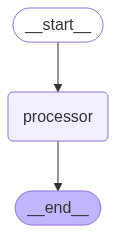

In [8]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

#### Agent Two Exercise

In [11]:
class AgentState(TypedDict):
    name : str
    operation : str
    values : List[int]
    result : str

In [15]:
def process(state:AgentState)->AgentState:
    """Processing Node"""
    if state['operation']=='+':
        value = sum(state['values'])
    else:
        value = 1
        for val in state['values']:
            value *= val
    state['result'] =  f"Hi {state['name']}. your answer is: {value}"
    return state

In [16]:
graph = StateGraph(state_schema=AgentState)

graph.add_node(node='processing', action=process)
graph.set_entry_point('processing')
graph.set_finish_point('processing')

app = graph.compile()

In [18]:
app.invoke({'name':'Jack Sparrow', 'operation':'x', 'values':[1,2,3,4,5], 'result':""})

{'name': 'Jack Sparrow',
 'operation': 'x',
 'values': [1, 2, 3, 4, 5],
 'result': 'Hi Jack Sparrow. your answer is: 120'}

### Agent Three

In [34]:
from typing import TypedDict
from langgraph.graph import StateGraph
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import Image, display

In [32]:
date_str = "2021-05-20"
dt_1 = datetime.strptime(date_str,"%Y-%m-%d")
date_str = "2022-05-20"
dt_2 = datetime.now() + timedelta(hours=5, minutes=30)
diff = relativedelta(dt_2, dt_1)
diff

relativedelta(years=+4, months=+1, days=+21, hours=+3, minutes=+3, seconds=+26, microseconds=+758718)

In [28]:
class AgentState(TypedDict):
    name:str
    birthdate:str
    result:str

In [33]:
def node_1(state:AgentState)->AgentState:
    """This is the greeting node."""
    state['result'] = f"Hi {state['name']}!"
    return state

def node_2(state:AgentState)->AgentState:
    """This is the node which calculates the age of the person."""
    dt_1 = datetime.strptime(state['birthdate'],"%Y-%m-%d")
    date_str = "2022-05-20"
    dt_2 = datetime.now() + timedelta(hours=5, minutes=30)
    diff = relativedelta(dt_2, dt_1)
    state['result'] = f"{state['result']}! You are {diff.years} years old."
    return state

graph = StateGraph(state_schema=AgentState)

graph.add_node(node='greeting', action=node_1)
graph.add_node(node='age', action=node_2)
graph.add_edge('greeting','age')
graph.set_entry_point('greeting')
graph.set_finish_point('age')

app = graph.compile()

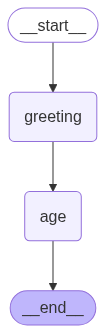

In [35]:
display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
app.invoke({'name':'James', 'birthdate':'1999-06-01'})

{'name': 'James',
 'birthdate': '1999-06-01',
 'result': 'Hi James!! You are 26 years old.'}

#### Graph 3 Exercise

In [41]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display

class AgentState(TypedDict):
    name:str
    age:int
    skills:List[str]
    result:str

def node_1(state:AgentState)->AgentState:
    """Greeting Node"""
    state['result'] = f"Hi! {state['name']}."
    return state

def node_2(state:AgentState)->AgentState:
    """Describe user age"""
    state['result'] = f"{state['result']} You are {state['age']} years old!"
    return state

def node_3(state:AgentState)->AgentState:
    """List skills node"""
    skills  = ""
    num_skills = len(state['skills'])
    for i in range(num_skills):
        if i==0:
            skills = f"{state['skills'][0]}"
        elif i<(num_skills-1):
            skills = f"{skills}, {state['skills'][i]}"
        else:
            skills = f"{skills} and {state['skills'][i]}"
    state['result'] = f"{state['result']} You have skills in : {skills}."
    return state

In [40]:
graph = StateGraph(state_schema=AgentState)

graph.add_node(node='greeting', action=node_1)
graph.add_node(node='age', action=node_2)
graph.add_node(node='skills', action=node_3)
graph.add_edge('greeting','age')
graph.add_edge('age','skills')
graph.set_entry_point('greeting')
graph.set_finish_point('skills')

app = graph.compile()

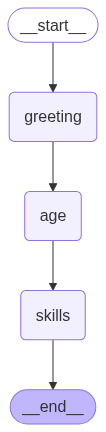

In [42]:
display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
app.invoke({'name':'Jhon', 'age':26, 'skills':['python','ML', 'LLM', 'AWS']})

{'name': 'Jhon',
 'age': 26,
 'skills': ['python', 'ML', 'LLM', 'AWS'],
 'result': 'Hi! Jhon. You are 26 years old! You have skills in : python, ML, LLM and AWS.'}

### Agent Four       
* Conditional edges

In [44]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    num_one:float
    num_two:float
    operation:str
    result:float

def add_node(state:AgentState)->AgentState:
    """This node is used for addition."""
    state['result'] = state['num_one'] + state['num_two']
    return state

def subs_node(state:AgentState)->AgentState:
    """This node is used for substraction."""
    state['result'] = state['num_one'] - state['num_two']
    return state

def decide_node(state:AgentState)->AgentState:
    """This node is used to decide the next node."""
    if state['operation'] == '+':
        return 'addition_opt'
    else:
        return 'substraction_opt'
    
graph = StateGraph(state_schema=AgentState)
graph.add_node(node='addition', action=add_node)
graph.add_node(node='substraction', action=subs_node)
graph.add_node(node='decider', action=lambda state:state) #pass through
graph.add_edge(START, 'decider')
graph.add_conditional_edges(source='decider', 
                            path=decide_node,
                            path_map={
                                #operation : node
                                'addition_opt':'addition',
                                'substraction_opt':'substraction'})
graph.add_edge('addition',END)
graph.add_edge('substraction',END)

app = graph.compile()

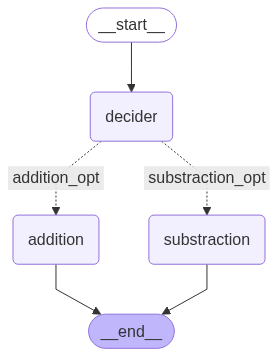

In [72]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({'num_one':10, 'num_two':11, 'operation':'+'})

{'num_one': 10, 'num_two': 11, 'operation': '+', 'result': 21}

#### Agent Five 
* Without pass through

In [119]:
class AgentState(TypedDict):
    num_one:float
    num_two:float
    operation:str
    result:float


def add_node(state:AgentState)->AgentState:
    """This node is used for addition."""
    state['result'] = state['num_one'] + state['num_two']
    return state

def subs_node(state:AgentState)->AgentState:
    """This node is used for substraction."""
    state['result'] = state['num_one'] - state['num_two']
    return state

def decide_node(state:AgentState)->AgentState:
    """This node is used to decide the next node."""
    if state['operation'] == '+':
        return 'add'
    else:
        return 'subs'
    
graph = StateGraph(state_schema=AgentState)
graph.add_node(node='addition', action=add_node)
graph.add_node(node='substraction', action=subs_node)
graph.add_conditional_edges(source=START, 
                            path=decide_node,
                            path_map={
                                #operation : node
                                'add':'addition',
                                'subs':'substraction'}
                                )
graph.add_edge('addition',END)
graph.add_edge('substraction',END)

app = graph.compile()

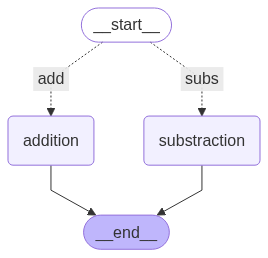

In [120]:
display(Image(app.get_graph().draw_mermaid_png()))

In [121]:
app.invoke({'num_one':10, 'num_two':11, 'operation':'+'})

{'num_one': 10, 'num_two': 11, 'operation': '+', 'result': 21}

#### Agent Four Exercise

In [51]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [74]:
class AgentState(TypedDict):
    number1:float
    number2:float
    number3:float
    number4:float
    operation1:str
    operation2:str
    finalNumber1:float
    finalNumber2:float

def add_node_one(state:AgentState)->AgentState:
    """This node is used for addition."""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subs_node_one(state:AgentState)->AgentState:
    """This node is used for substraction."""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def add_node_two(state:AgentState)->AgentState:
    """This node is used for addition."""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subs_node_two(state:AgentState)->AgentState:
    """This node is used for substraction."""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_node_one(state:AgentState):
    """This node is used to decide the next node."""
    if state['operation1'] == '+':
        return 'add_opt'
    else:
        return 'subs_opt'
    
def decide_node_two(state:AgentState):
    """This node is used to decide the next node."""
    if state['operation2'] == '+':
        return 'add_opt'
    else:
        return 'subs_opt'
    
graph = StateGraph(state_schema=AgentState)

graph.add_node(node='initial_add', action=add_node_one)
graph.add_node(node='initial_sub', action=subs_node_one)
graph.add_node(node='add', action=add_node_two)
graph.add_node(node='sub', action=subs_node_two)
graph.add_node(node='router1', action=lambda state : state)
graph.add_node(node='router2', action=lambda state : state)

graph.add_edge(START, 'router1')

graph.add_conditional_edges(source='router1',
                            path=decide_node_one,
                            path_map={
                                'add_opt':'initial_add',
                                'subs_opt':'initial_sub'
                            })

graph.add_edge('initial_add','router2')
graph.add_edge('initial_sub','router2')

graph.add_conditional_edges(source='router2',
                            path=decide_node_two,
                            path_map={
                                'add_opt':'add',
                                'subs_opt':'sub'
                            })

graph.add_edge('add',END)
graph.add_edge('sub',END)

app = graph.compile()

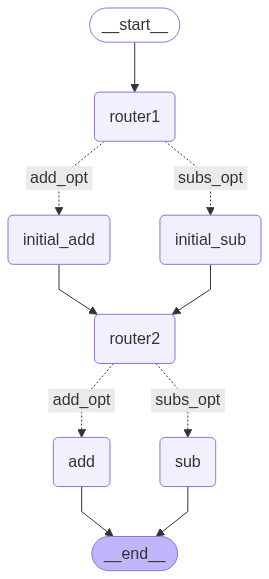

In [75]:
display(Image(app.get_graph().draw_mermaid_png()))

In [76]:
app.invoke({'number1':10, 'number2':14, 'number3':11, 'number4':14, 'operation1':'+', 'operation2':'-', 'finalNumber1':0, 'finalNumber2':0})

{'number1': 10,
 'number2': 14,
 'number3': 11,
 'number4': 14,
 'operation1': '+',
 'operation2': '-',
 'finalNumber1': 24,
 'finalNumber2': -3}

### Agent Five  
* Looping

In [79]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import random

In [87]:
random.randint(1,10)

3

In [106]:
class AgentState(TypedDict):
    name : str
    random_num : int
    itteration : int
    result : str

def greeting_node(state:AgentState)->AgentState:
    state['result'] = f"Hi {state['name']}!."
    state['itteration'] = 1
    return state

def random_num_node(state:AgentState)->AgentState:
    state['random_num'] = random.randint(1,10)
    #print(state)
    return state

def loop_node(state:AgentState)->AgentState:
    state['result'] = f"{state['result']}\nItteration:{state['itteration']}"
    state['itteration'] += 1
    return state

def loop_decider(state:AgentState):
    if state['itteration']<=state['random_num']:
        return 'loop'
    else:
        return 'end'

graph = StateGraph(state_schema=AgentState)

graph.add_node(node='greeting node', action=greeting_node)
graph.add_node(node='random num node', action=random_num_node)
graph.add_node(node='loop node', action=loop_node)
#graph.add_node(node='looper', action=lambda state:state)

graph.add_edge(START, 'greeting node')
graph.add_edge('greeting node', 'random num node')
graph.add_edge('random num node', 'loop node')
#graph.add_edge('loop node','looper')

graph.add_conditional_edges(source='loop node',
                            path=loop_decider,
                            path_map={
                                'loop':'loop node',
                                'end' : END
                            })

app = graph.compile()

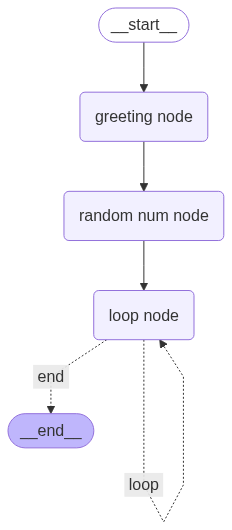

In [107]:
display(Image(app.get_graph().draw_mermaid_png()))

In [105]:
app.invoke({'name':'Jhon'})

{'name': 'Jhon',
 'random_num': 9,
 'itteration': 10,
 'result': 'Hi Jhon!.\nItteration:1\nItteration:2\nItteration:3\nItteration:4\nItteration:5\nItteration:6\nItteration:7\nItteration:8\nItteration:9'}

#### Agent Five Exercise

In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [145]:
class AgentState(TypedDict):
    player_name : str
    number : int
    guesses : List[int]
    attempts : int
    lower_bound : int
    upper_bound : int
    hint : str

def setup_node(state:AgentState)->AgentState:
    state['attempts'] = 0
    state['hint'] = 'init'
    state['guesses'] = []
    return state

def guess_node(state:AgentState)->AgentState:
    #set lower bound and upper bound
    if state['hint']=='lower':
        state['upper_bound'] = state['guesses'][-1]
    elif state['hint']=='higher':
        state['lower_bound'] = state['guesses'][-1]
    else:
        state['lower_bound'] = 1
        state['upper_bound'] = 20
    #guess
    guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(guess)
    #attept count
    state['attempts'] += 1
    #
    return state

def compare_node(state:AgentState)->AgentState:
    #comapre
    if state['guesses'][-1] < state['number']:
        state['hint'] = 'higher'
    elif state['guesses'][-1] > state['number']:
        state['hint'] = 'lower'
    else:
        state['hint'] = 'equal'
    #print(f"state:{state}")
    return state

def decider(state:AgentState):
    if state['hint'] == 'equal' or state['attempts']>=7:
        return 'exit'
    else:
        return 'continue'
    
graph = StateGraph(state_schema=AgentState)

#nodes
graph.add_node(node='setup', action=setup_node)
graph.add_node(node='guess', action=guess_node)
graph.add_node(node='compare', action=compare_node)

#edges
graph.add_edge(START, 'setup')
graph.add_edge('setup','guess')
graph.add_edge('guess', 'compare')

#conditional edges
graph.add_conditional_edges(source='compare',
                            path=decider,
                            path_map={
                                'continue':'guess',
                                'exit':END
                            })

#compile
app = graph.compile()

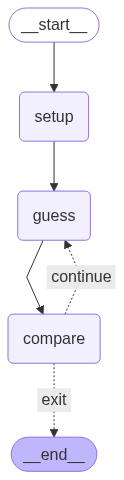

In [146]:
display(Image(app.get_graph().draw_mermaid_png()))

In [147]:
app.invoke({'player_name':'James', 'number':10})

{'player_name': 'James',
 'number': 10,
 'guesses': [10],
 'attempts': 1,
 'lower_bound': 1,
 'upper_bound': 20,
 'hint': 'equal'}